# Predicting Customer Spending for an E-Commerce Company
**Project Type**: Linear Regression  
**Goal**: Help a retail company decide whether to invest more in their **mobile app** or **website** to increase customer purchases.


In [17]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [18]:
# Step 2: Load Dataset
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [19]:
# Step 3: Initial Exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [20]:
df_numeric = df.drop(['Email', 'Address', 'Avatar'], axis=1)

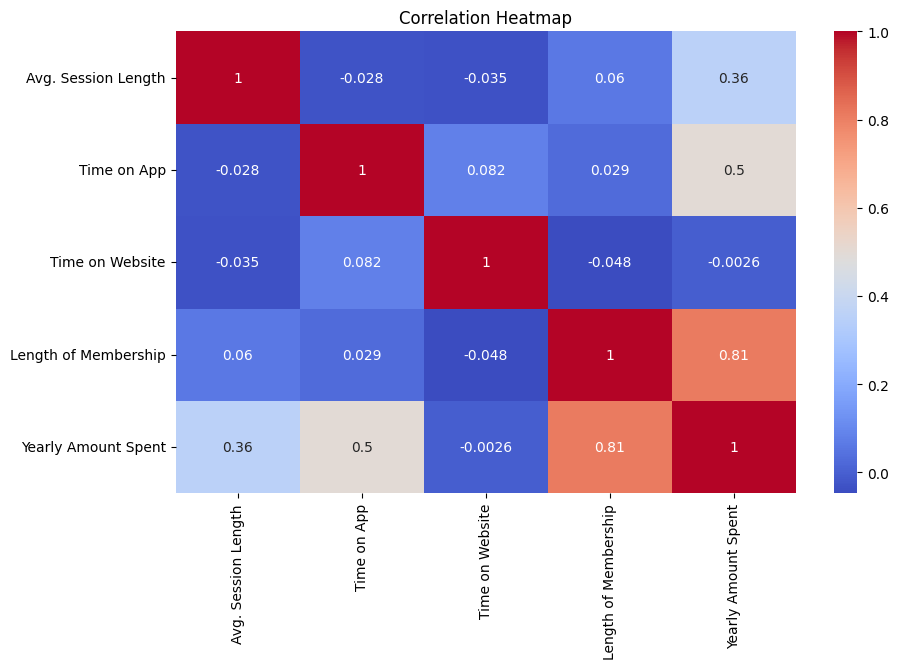

In [21]:
# Step 4: Visualize Correlations 
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


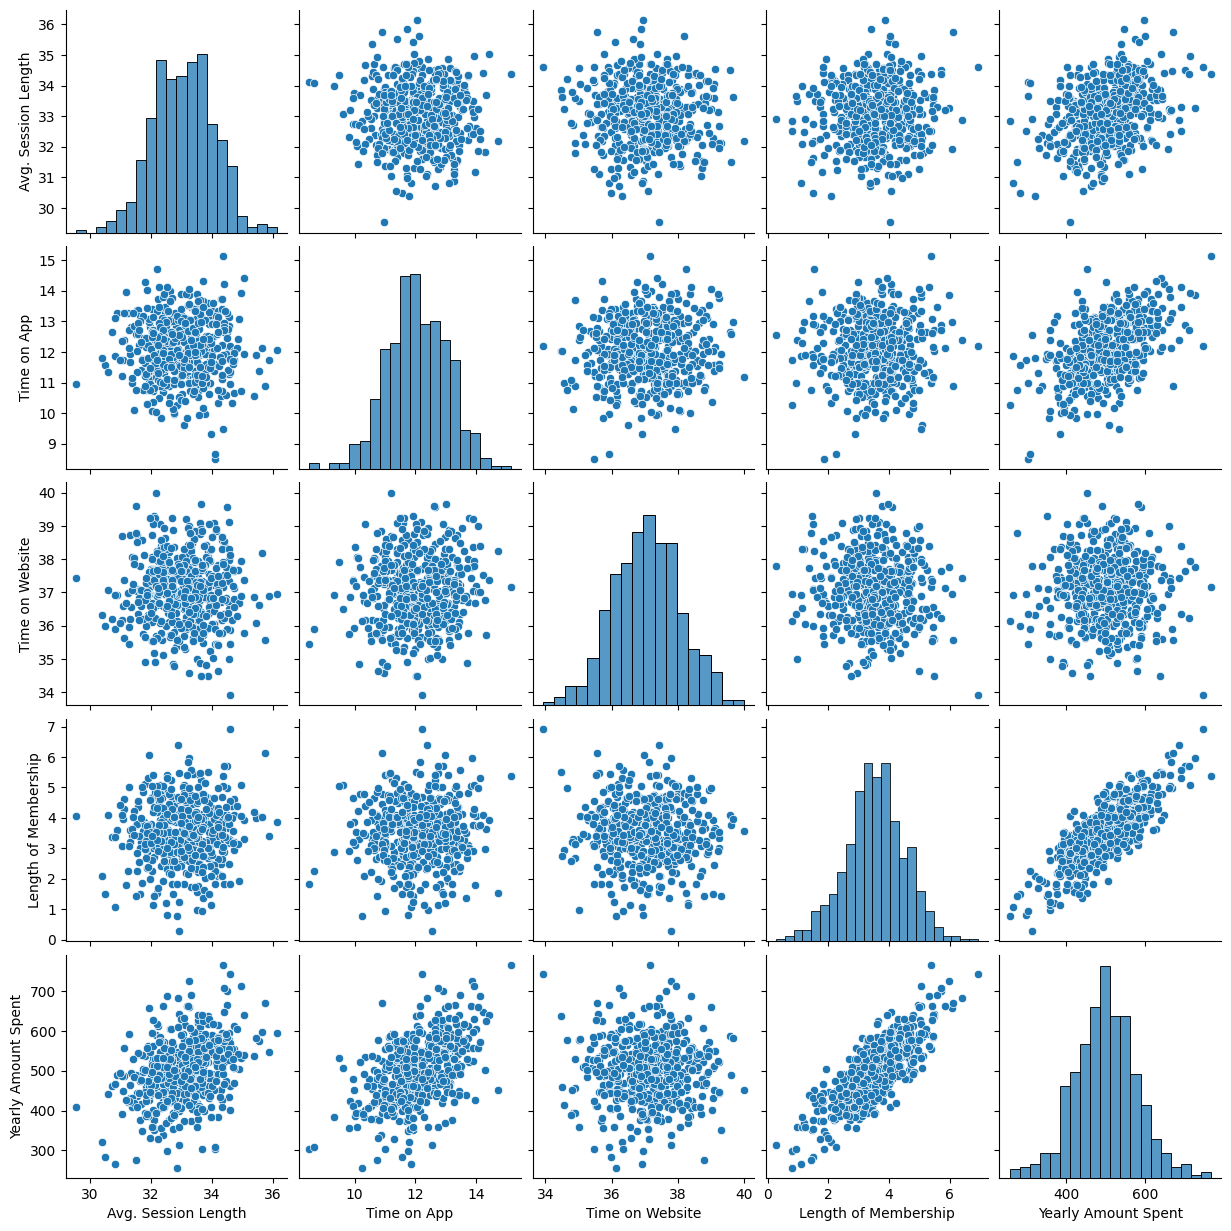

In [22]:
# Step 5: Pairplot
sns.pairplot(df)

In [23]:
# Step 6: Feature Selection 
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [24]:
#  Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [25]:
# Step 8: Build and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")


Model Coefficients:
Avg. Session Length: 25.981549723495785
Time on App: 38.59015875311411
Time on Website: 0.19040527751100456
Length of Membership: 61.27909654482187


In [27]:
# Step 9: Evaluate Model 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error : {mae}")


Mean Squared Error: 79.81305165097427
R² Score: 0.9890046246741234
Mean Absolute Error : 7.228148653430826


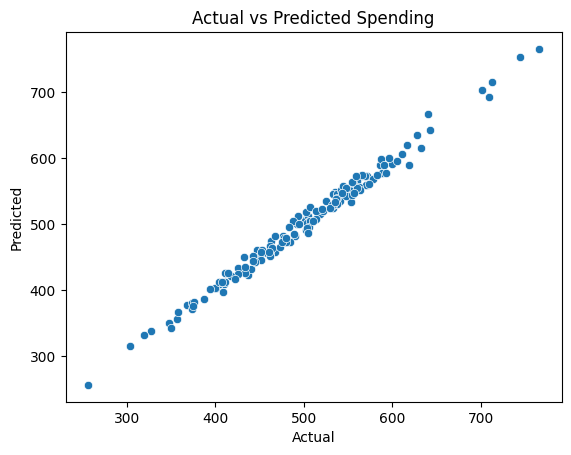

In [15]:
# Step 10: Plot Predictions vs Actual 
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Spending")
plt.show()


## Model Evaluation

The "Actual vs Predicted Spending" plot shows a strong linear relationship. The model predicts customer yearly spending very accurately, with minimal error. This confirms that linear regression was a good fit for this problem.


## Business Insight

- The feature **Time on App** had a stronger impact on yearly spending than **Time on Website**.
- This suggests the company should **invest more into improving the mobile app experience** to increase revenue.
